In [27]:
using Plots
using Random
using StatsBase
using Plots.PlotMeasures
using DelimitedFiles
using JLD2

In [10]:
train_data = readdlm("ItalyPowerDemand_TRAIN.txt");
test_data = readdlm("ItalyPowerDemand_TEST.txt")
X_train = train_data[:, 2:end]
y_train = Int.(train_data[:, 1]) .- 1
X_test = test_data[:, 2:end]
y_test = Int.(test_data[:,1]) .- 1;

In [41]:
counts_train = countmap(y_train)
println(counts_train)
counts_test = countmap(y_test);
println(counts_test)

Dict(0 => 34, 1 => 33)
Dict(0 => 513, 1 => 516)


# Plot Examples

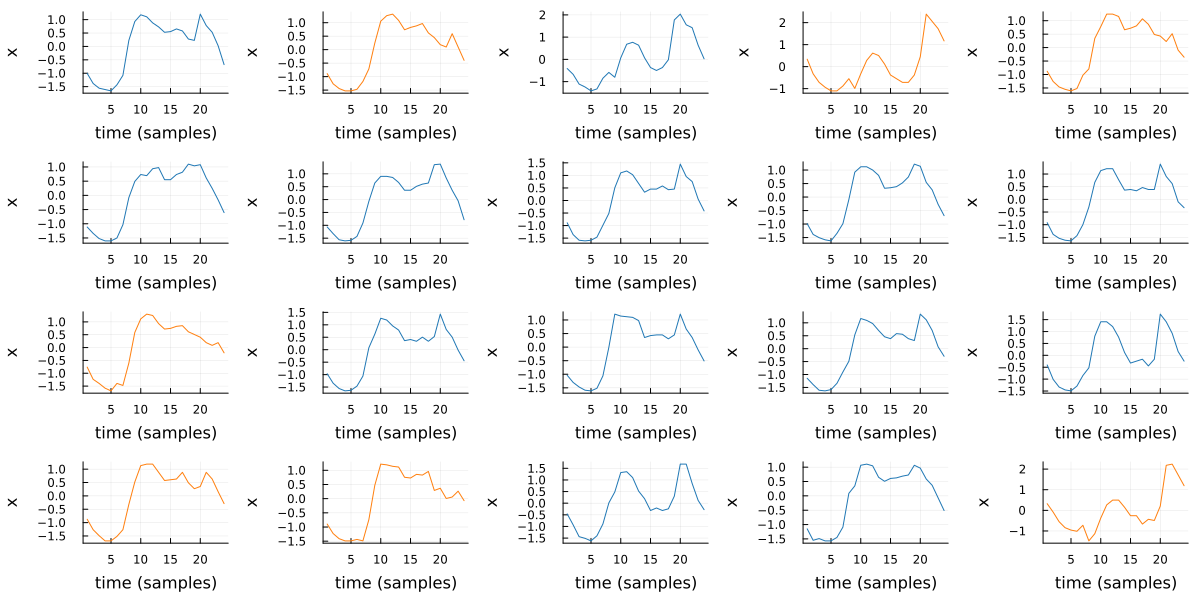

In [28]:
plot_idxs = sample(1:size(X_train, 1), 20; replace=false);
ps = []
for pidx in plot_idxs
    colour = palette(:tab10)[y_train[pidx] + 1]
    p = plot(X_train[pidx, :], xlabel="time (samples)", ylabel="x", c=colour, label="")
    push!(ps, p)
end
plot(ps..., size=(1200, 600), bottom_margin=5mm, left_margin=5mm)

# Construct datasets

I will make two versions - one which seperates out the classes as per the original labels and a second which combines them all into one. 

In [44]:
#@save "/Users/joshua/Desktop/QTNML_paper/QuantumInspiredML/Interpolation/paper/italypower/datasets/ItalyPowerDemandOrig.jld2" X_train y_train X_test y_test

Version which combines all of the training data into one class and all of the testing data into a single class. 

In [48]:
y_train = Int.(zeros(size(X_train, 1)))
y_test = Int.(zeros(size(X_test, 1)));

In [50]:
@save "/Users/joshua/Desktop/QTNML_paper/QuantumInspiredML/Interpolation/paper/italypower/datasets/ItalyPowerDemandSingleClass.jld2" X_train y_train X_test y_test